# Análise de dados e clusterização como ferramentas na busca pela satisfação do cliente 

Reunião dos scripts utilizados em todas as fases do projeto

# Processamento/Tratamento de dados

Bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from pandas.api.types import is_numeric_dtype
plt.style.use('ggplot')
sns.set_style('whitegrid')
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install wordcloud -q
!pip install sklearn-som
from sklearn_som.som import SOM
from numpy import random as np_random
!pip install numpy==1.19.2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Populating the interactive namespace from numpy and matplotlib


Importação de bases

In [2]:
db_consumidor = pd.read_csv('dataset_consumidor.gov.csv', sep=';', encoding='utf-8', decimal=',')


In [3]:
#Exibição dos dados da base consumidor
db_consumidor.head().T

,0,1,2,3,4
Gestor,Programa Estadual de Proteção e Defesa do Cons...,Departamento Estadual de Proteção e Defesa do ...,Fundação de Proteção e Defesa do Consumidor,Instituto Municipal de Proteção e Defesa do Co...,Secretaria de Estado da Justiça e Cidadania de...
Canal de Origem,Plataforma Web,Plataforma Web,Plataforma Web,Plataforma Web,Plataforma Web
Região,NE,S,SE,SE,S
UF,CE,PR,SP,RJ,SC
Cidade,Fortaleza,Curitiba,Guarulhos,Rio de Janeiro,Balneário Camboriú
Sexo,M,M,F,F,M
Faixa Etária,entre 31 a 40 anos,entre 21 a 30 anos,entre 21 a 30 anos,entre 31 a 40 anos,entre 31 a 40 anos
Ano Abertura,2021.0,2021.0,2021.0,2021.0,2021.0
Mês Abertura,1.0,1.0,1.0,1.0,1.0
Data Abertura,01/01/2021,01/01/2021,01/01/2021,01/01/2021,01/01/2021


In [4]:
#Exibição dos dados da base BACEN
db_bacen.head().T

,0,1,2,3,4
Ano,2021,2021,2021,2021,2021
Trimestre,1º,1º,1º,1º,1º
Categoria,Grupo Secundário,Grupo Secundário,Grupo Secundário,Grupo Secundário,Grupo Secundário
Tipo,Conglomerado,Conglomerado,Conglomerado,Conglomerado,Conglomerado
CNPJ IF,,,,,
Instituição financeira,ABC-BRASIL (conglomerado),ABC-BRASIL (conglomerado),ABC-BRASIL (conglomerado),ABC-BRASIL (conglomerado),ABC-BRASIL (conglomerado)
Irregularidade,Abertura de conta de depósito com documentação...,Abertura de conta de pagamento sem documentaçã...,Inclusão de dados incorretos no CCS (Cadastro ...,Insatisfação com o atendimento prestado por ag...,"Integridade, confiabilidade, segurança, sigilo..."
Quantidade de reclamações reguladas procedentes,0,0,1,0,0
Quantidade de reclamações reguladas - outras,1,1,0,0,1
Quantidade de reclamações não reguladas,0,0,0,1,0


In [5]:
#Exibição de registros e atributos, quantidades e tipos de dados
db_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121728 entries, 0 to 121727
Data columns (total 31 columns):
Gestor                    121728 non-null object
Canal de Origem           121728 non-null object
Região                    121728 non-null object
UF                        121728 non-null object
Cidade                    121728 non-null object
Sexo                      121716 non-null object
Faixa Etária              121728 non-null object
Ano Abertura              121728 non-null object
Mês Abertura              121728 non-null object
Data Abertura             121728 non-null object
Data Resposta             108762 non-null object
Data Análise              13196 non-null object
Data Recusa               13342 non-null object
Data Finalização          121728 non-null object
Prazo Resposta            121728 non-null object
Prazo Analise Gestor      13196 non-null object
Tempo Resposta            108762 non-null float64
Nome Fantasia             121728 non-null object
Segmento 

In [6]:
db_bacen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 11 columns):
Ano                                                2347 non-null int64
Trimestre                                          2347 non-null object
Categoria                                          2347 non-null object
Tipo                                               2347 non-null object
CNPJ IF                                            2347 non-null object
Instituição financeira                             2347 non-null object
Irregularidade                                     2347 non-null object
Quantidade de reclamações reguladas procedentes    2347 non-null int64
Quantidade de reclamações reguladas - outras       2347 non-null int64
Quantidade de reclamações não reguladas            2347 non-null int64
Quantidade total de reclamações                    2347 non-null int64
dtypes: int64(5), object(6)
memory usage: 201.8+ KB


In [7]:
#Exibição de valores únicos, dados mais frequentes, média, mínimo, máximo
db_consumidor.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gestor,121728,16,Fundação de Proteção e Defesa do Consumidor,30489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal de Origem,121728,3,Plataforma Web,119850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Região,121728,5,SE,56556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF,121728,27,SP,30480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cidade,121728,3831,São Paulo,11622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,121716,3,M,69231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faixa Etária,121728,7,entre 31 a 40 anos,38762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ano Abertura,121728,2,2021.0,119577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,121728,3,1.0,83519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Abertura,121728,74,20/01/2021,4907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
db_bacen.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ano,2347,NaN,NaN,NaN,2021,0,2021,2021,2021,2021,2021
Trimestre,2347,1,1º,2347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Categoria,2347,2,Grupo Secundário,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo,2347,2,Conglomerado,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNPJ IF,2347,46,,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instituição financeira,2347,105,BB (conglomerado),108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Irregularidade,2347,115,Insatisfação com a resposta recebida da instit...,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantidade de reclamações reguladas procedentes,2347,NaN,NaN,NaN,11.3762,101.574,0,0,0,3,4217
Quantidade de reclamações reguladas - outras,2347,NaN,NaN,NaN,11.6455,41.9073,0,0,1,4,700
Quantidade de reclamações não reguladas,2347,NaN,NaN,NaN,7.40307,42.7361,0,0,0,1,1071


In [9]:
#Contagem de valores nulos da base consumidor
db_consumidor.isnull().sum()

Gestor                         0
Canal de Origem                0
Região                         0
UF                             0
Cidade                         0
Sexo                          12
Faixa Etária                   0
Ano Abertura                   0
Mês Abertura                   0
Data Abertura                  0
Data Resposta              12966
Data Análise              108532
Data Recusa               108386
Data Finalização               0
Prazo Resposta                 0
Prazo Analise Gestor      108532
Tempo Resposta             12966
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação       11837
Nota do Consumidor         66256
Análise da Recusa         108429
Unnamed: 3

In [10]:
#Contagem de valores nulos da base BACEN
db_bacen.isnull().sum()

Ano                                                0
Trimestre                                          0
Categoria                                          0
Tipo                                               0
CNPJ IF                                            0
Instituição financeira                             0
Irregularidade                                     0
Quantidade de reclamações reguladas procedentes    0
Quantidade de reclamações reguladas - outras       0
Quantidade de reclamações não reguladas            0
Quantidade total de reclamações                    0
dtype: int64

In [11]:
#Exclusão de colunas e exibição da quantidade de registros e atributos antes e depois
shape_antes=db_consumidor.shape
print("Antes:\t", shape_antes)
df_consumidor=db_consumidor.drop(columns=['Unnamed: 30','Data Análise','Data Recusa',
                                          'Prazo Analise Gestor','Nota do Consumidor','Análise da Recusa'])
shape_depois=df_consumidor.shape
print("Depois:\t", shape_depois)

Antes:	 (121728, 31)
Depois:	 (121728, 25)


In [12]:
df_consumidor.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gestor,121728,16,Fundação de Proteção e Defesa do Consumidor,30489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canal de Origem,121728,3,Plataforma Web,119850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Região,121728,5,SE,56556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF,121728,27,SP,30480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cidade,121728,3831,São Paulo,11622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,121716,3,M,69231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faixa Etária,121728,7,entre 31 a 40 anos,38762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ano Abertura,121728,2,2021.0,119577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,121728,3,1.0,83519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Abertura,121728,74,20/01/2021,4907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Exclusão de colunas e exibição da quantidade de registros e atributos antes e depois - Base BACEN
shape_antes=db_bacen.shape
print("Antes:\t", shape_antes)
df_bacen=db_bacen.drop(columns=['Ano','Trimestre','Tipo','CNPJ IF'])
shape_depois=df_bacen.shape
print("Depois:\t", shape_depois)

Antes:	 (2347, 11)
Depois:	 (2347, 7)


# Análise e exploração dos dados

# - DATASET www.consumidor.gov.br

#    * Análise geográfica

In [14]:
#Identificação de regiões com maior número de reclamações
df_consumidor['Região'].value_counts()


SE    56556
S     22757
NE    21518
CO    15723
N      5174
Name: Região, dtype: int64

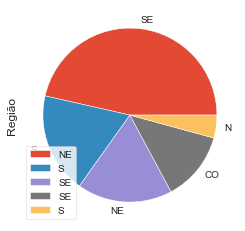

In [15]:
regiao = df_consumidor['Região'].value_counts().plot.pie()
plt.legend(df_consumidor['Região'], loc=3)


In [16]:
#Cidades com maior número de reclamações
df_consumidor['Cidade'].value_counts().head(10)

São Paulo         11622
Rio de Janeiro     5733
Brasília           4734
Curitiba           4390
Salvador           3597
Belo Horizonte     3469
Iguatemi           3048
Goiânia            2138
Fortaleza          1857
Porto Alegre       1257
Name: Cidade, dtype: int64

#  * Análise do perfil dos consumidores

In [17]:
#Cruzamento de faixa etária e sexo
df_consumidor.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    14975
      entre 21 a 30 anos    12641
      entre 41 a 50 anos     8405
      entre 51 a 60 anos     6669
      entre 61 a 70 anos     6034
      mais de 70 anos        2868
      até 20 anos             844
M     entre 31 a 40 anos    23774
      entre 21 a 30 anos    18795
      entre 41 a 50 anos    11565
      entre 51 a 60 anos     6091
      entre 61 a 70 anos     4798
      mais de 70 anos        2729
      até 20 anos            1479
O     entre 21 a 30 anos       18
      entre 31 a 40 anos        8
      mais de 70 anos           8
      entre 41 a 50 anos        5
      entre 51 a 60 anos        5
      entre 61 a 70 anos        3
      até 20 anos               2
Name: Faixa Etária, dtype: int64

In [18]:
#Ordenação dos canais de compra
df_consumidor['Como Comprou Contratou'].value_counts()

Internet                   49157
Não comprei / contratei    33476
Loja física                17828
Telefone                   16125
Domicílio                   3368
SMS / Mensagem de texto      567
Ganhei de presente           468
Catálogo                     414
Stand, feiras e eventos      325
Name: Como Comprou Contratou, dtype: int64

In [19]:
#Contagem dos consumidores que procuram a empresa antes do registro da reclamação
df_consumidor['Procurou Empresa'].value_counts()

S    94170
N    27558
Name: Procurou Empresa, dtype: int64

#  * Análise do perfil das empresas

In [20]:
#Segmentos mais reclamado
df_consumidor['Segmento de Mercado'].value_counts()

Bancos, Financeiras e Administradoras de Cartão                            31890
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    26224
Bancos de Dados e Cadastros de Consumidores                                11352
Comércio Eletrônico                                                         9606
Transporte Aéreo                                                            7191
Empresas de Pagamento Eletrônico                                            6106
Empresas de Intermediação de Serviços / Negócios                            4316
Viagens, Turismo e Hospedagem                                               4051
Energia Elétrica                                                            3819
Corretoras e Sociedades de Seguros, Capitalização e Previdência             2728
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       2612
Varejo                                                                      1470
Programas de Fidelidade     

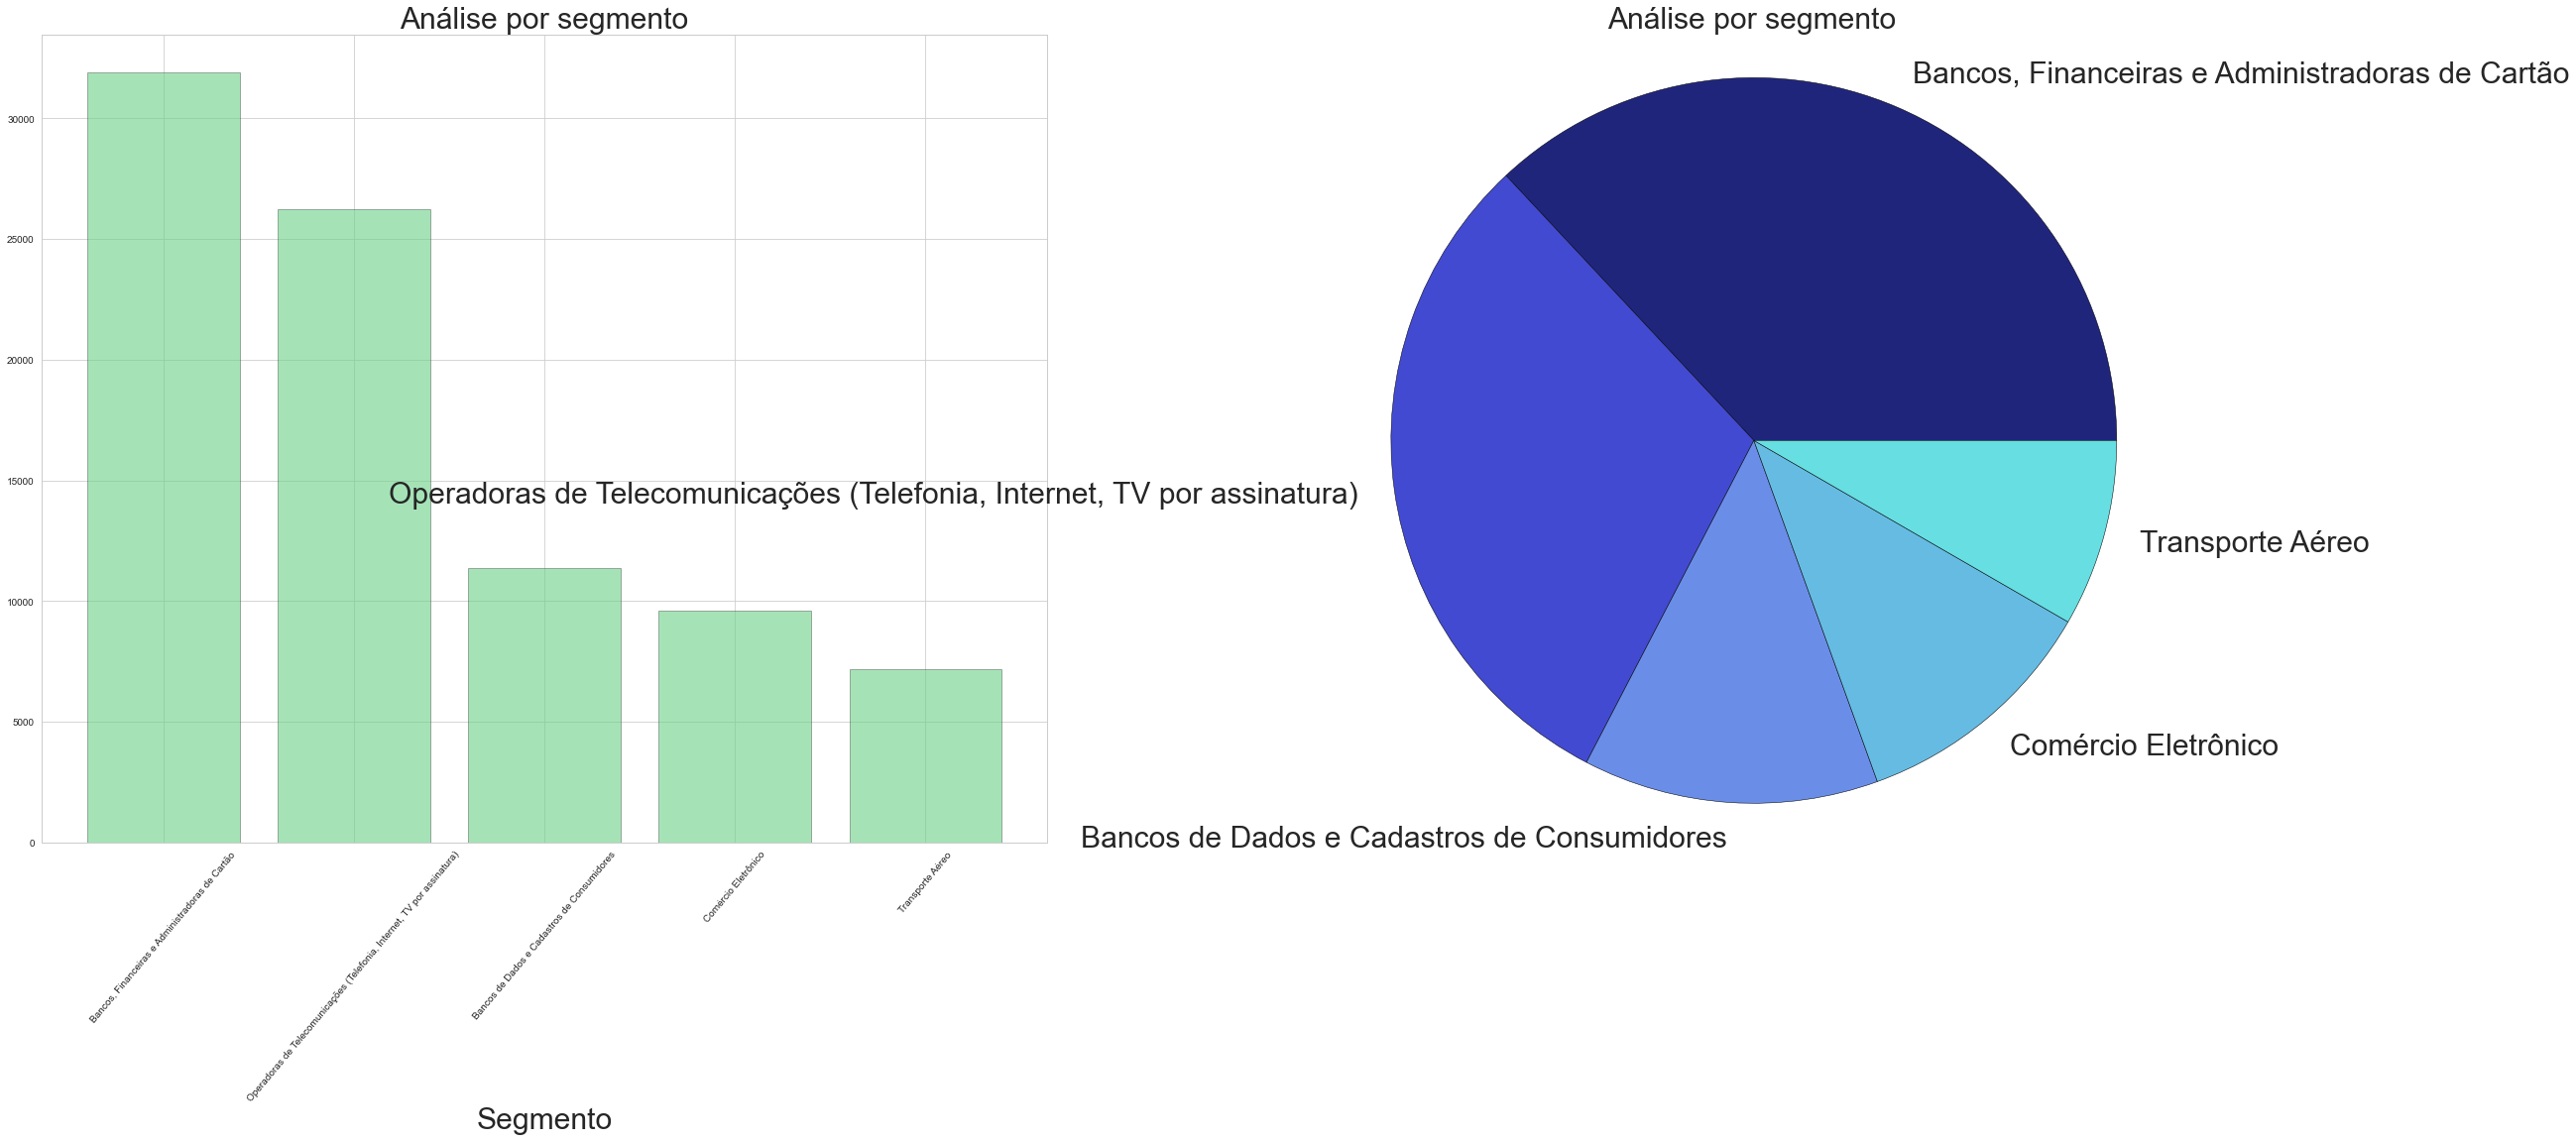

In [21]:
#Representação dos 5 segmentos mais reclamados

count = df_consumidor['Segmento de Mercado'].value_counts().head(5).values
anos = df_consumidor['Segmento de Mercado'].value_counts().head(5).index
fig = plt.figure(figsize = (40, 15))
plt.subplot(1, 2, 1)
plt.bar(anos, count, ec = "k", alpha = .6, color = "#6ad187")
plt.xlabel("Segmento",fontsize= 30)
plt.xticks(rotation=50)
plt.title("Análise por segmento",fontsize= 30)
plt.subplot(1, 2, 2)
plt.pie(count, 
        labels = list(anos),  
        colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.1,
        
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 30}, 
        )
plt.axis("equal")
plt.title("Análise por segmento",fontsize= 30)
plt.rcParams['figure.dpi'] = 200
fig.savefig('top_seg.png')

In [22]:
# 20 Empresas mais reclamadas no período
df_consumidor['Nome Fantasia'].value_counts().head(20)

Serasa Experian                      9480
Vivo - Telefônica                    7259
Tim                                  4572
Mercado Pago                         4546
Claro Celular                        3859
Oi Fixo                              3279
Caixa Econômica Federal              3055
Gol Linhas Aéreas                    2711
Banco Bradesco                       2557
Mercado Livre                        2527
Latam Airlines (Tam)                 2419
Decolar.com                          2382
Banco Pan                            2038
Magazineluiza.com                    1931
Banco BMG                            1806
Oi Celular                           1777
NET                                  1656
Banco C6 Consignado (Banco Ficsa)    1602
Americanas.com                       1596
Banco do Brasil                      1377
Name: Nome Fantasia, dtype: int64

In [23]:
#Empresas mais reclamadas do segmento mais reclamado
top_segmento = df_consumidor[df_consumidor['Segmento de Mercado']=='Bancos, Financeiras e Administradoras de Cartão']
top_segmento['Nome Fantasia'].value_counts().head(10)

Caixa Econômica Federal              3055
Banco Bradesco                       2557
Banco Pan                            2038
Banco BMG                            1806
Banco C6 Consignado (Banco Ficsa)    1602
Banco do Brasil                      1377
Banco Santander                      1313
Itaú Consignado                      1301
Itaucard                              971
Banco Itaú Unibanco                   970
Name: Nome Fantasia, dtype: int64

#  * Análise das reclamações

In [24]:
#Ordenação dos assuntos mais reclamados

df_consumidor['Assunto'].value_counts().head(20)

Banco de Dados e Cadastros de Consumidores (SPC, Serasa, SCPC etc)                             14152
Crédito Consignado / Cartão de Crédito Consignado / RMC (para beneficiários do INSS)            9496
Cartão de Crédito / Cartão de Débito / Cartão de Loja                                           8449
Aéreo                                                                                           7542
Telefonia Móvel Pós-paga                                                                        6111
Serviço de pagamento online/ via celular/ maquininha                                            5050
Aparelho celular                                                                                4524
Pacote de Serviços ( Combo )                                                                    4459
Energia Elétrica                                                                                3819
Internet Fixa                                                                              

In [25]:
#Ordenação dos problemas mais reclamados

df_consumidor['Problema'].value_counts().head(20)

Dados pessoais ou financeiros consultados, coletados, publicados ou repassados sem autorização    10483
Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa                 8737
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores               8654
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                     8322
Cobrança indevida / abusiva para alterar ou cancelar o contrato                                    8188
Não entrega do contrato ou documentação relacionada ao serviço                                     5429
Não entrega / demora na entrega do produto                                                         4533
SAC - Demanda não resolvida / não respondida / respondida após o prazo                             4119
Cobrança de tarifas, taxas, valores não previstos / não informados                                 3767
Dificuldade de contato / demora no atendimento                  

#  * Análise do tratamento das ocorrências

In [26]:
#Proporção de reclamações não resolvidas por segmento de mercado
x = df_consumidor.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

df = df_consumidor[df_consumidor['Segmento de Mercado'].isin(x.keys())]
df = df[df['Avaliação Reclamação']=='Não Resolvida']
x1 = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()
x1

Segmento de Mercado
Administradoras de Consórcios                                                72
Agua e Saneamento                                                           197
Artigos Esportivos                                                           51
Bancos de Dados e Cadastros de Consumidores                                2572
Bancos, Financeiras e Administradoras de Cartão                            5812
Cartões de Descontos                                                         20
Comércio Eletrônico                                                        2208
Construtoras, Incorporadoras e Imobiliárias                                  66
Corretoras e Sociedades de Seguros, Capitalização e Previdência             578
Distribuidoras de Combustíveis / Gás                                         84
Editoras e Veículos de Imprensa                                              51
Empresas de Intermediação de Serviços / Negócios                            809
Empresas de Pagament

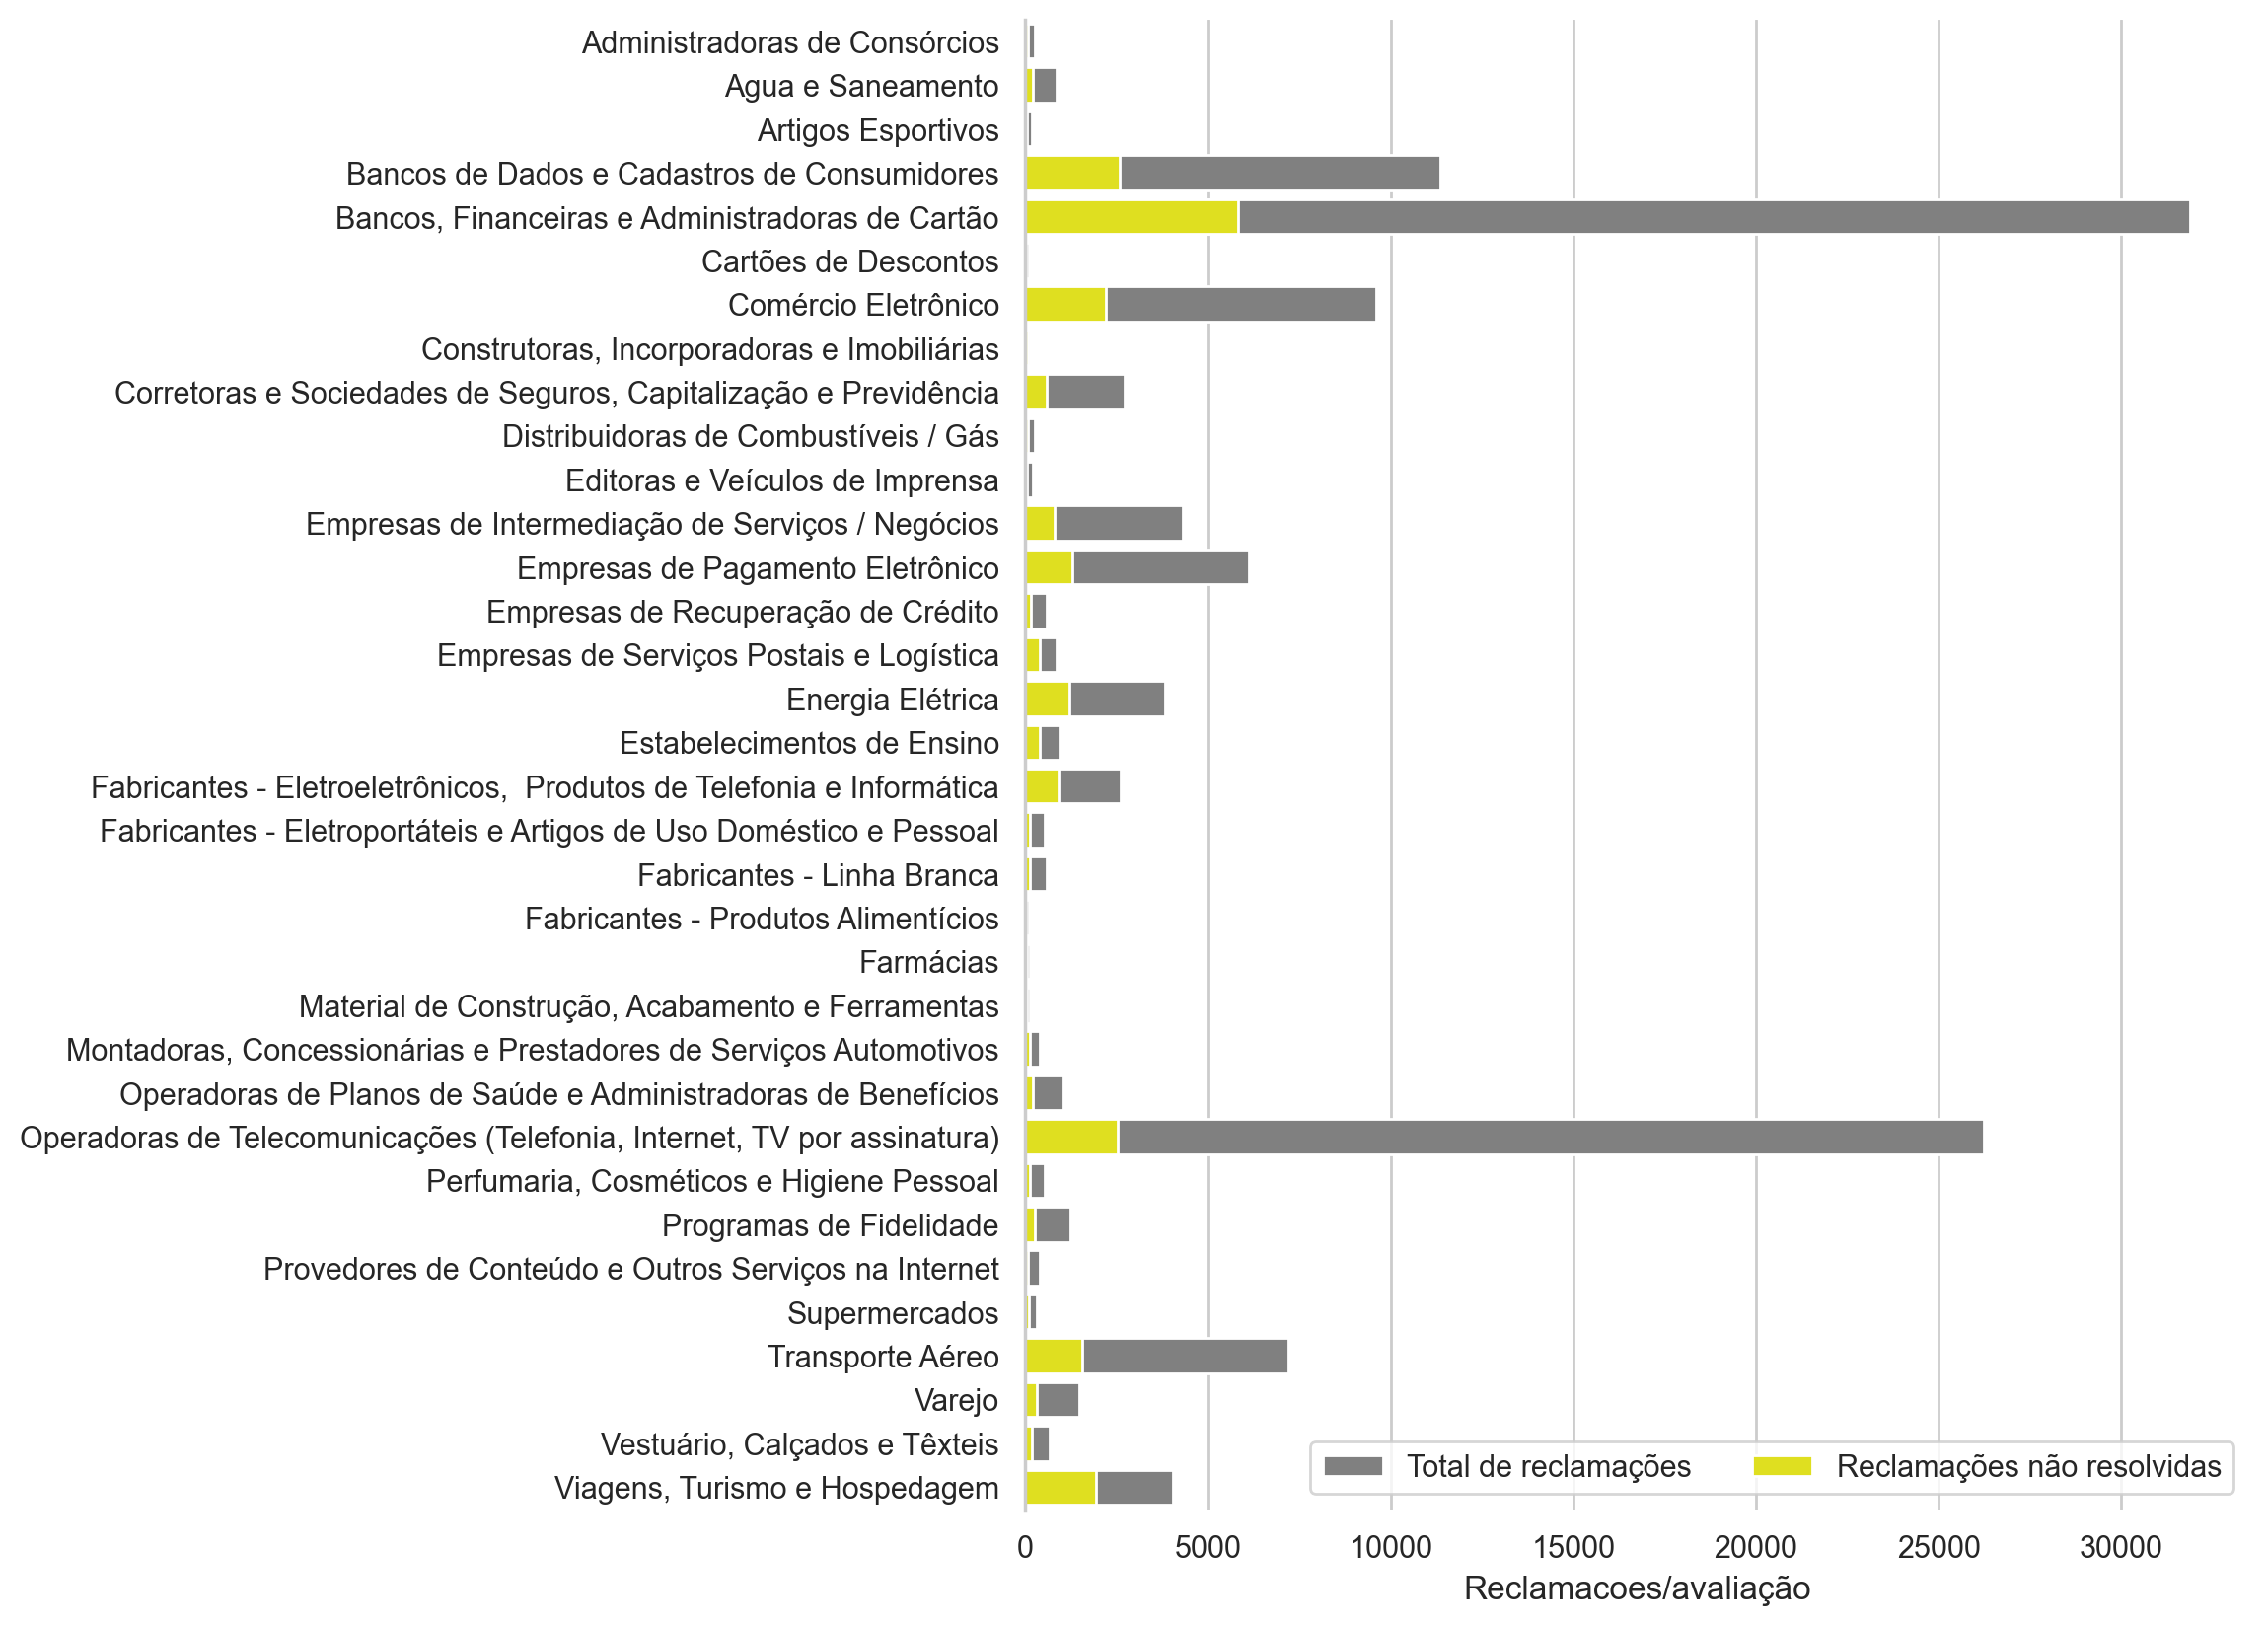

In [27]:
#Proporção de reclamações não resolvidas por segmento de mercado
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

#sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamações", color="grey")

#sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamações não resolvidas", color="yellow")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes/avaliação")
sns.despine(left=False, bottom=True)


In [28]:
#Exibição das reclamações avaliadas como resolvidas
situacao = df_consumidor[df_consumidor['Avaliação Reclamação']=='Resolvida']
situacao

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação
76,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Belo Horizonte,F,entre 41 a 50 anos,2021.0,1.0,01/01/2021,...,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Fogão, microondas, forno elétrico, depurador d...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida
83,Secretaria Nacional do Consumidor,Plataforma Web,N,AM,Manaus,M,entre 21 a 30 anos,2021.0,1.0,01/01/2021,...,Agua e Saneamento,"Água, Energia, Gás",Água e Esgoto,Vício de Qualidade,Interrupção/instabilidade do fornecimento,Telefone,S,S,Finalizada avaliada,Resolvida
85,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Santos Dumont,F,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,Agua e Saneamento,"Água, Energia, Gás",Água e Esgoto,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida
96,Departamento Estadual de Proteção e Defesa do ...,Plataforma Web,S,PR,Curitiba,F,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,Internet,S,S,Finalizada avaliada,Resolvida
127,Departamento Estadual de Proteção e Defesa do ...,Plataforma Web,S,PR,Rio Negro,M,entre 31 a 40 anos,2021.0,1.0,01/01/2021,...,"Viagens, Turismo e Hospedagem",Turismo/Viagens,Pacote / excursão / agência de turismo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121611,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Canoas,F,entre 41 a 50 anos,2020.0,12.0,31/12/2020,...,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Resolvida
121634,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Contagem,M,entre 21 a 30 anos,2020.0,12.0,31/12/2020,...,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida
121653,Secretaria Nacional do Consumidor,Plataforma Web,NE,MA,Humberto de Campos,M,entre 31 a 40 anos,2020.0,12.0,31/12/2020,...,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida
121661,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,F,entre 31 a 40 anos,2020.0,12.0,31/12/2020,...,Comércio Eletrônico,Produtos de Telefonia e Informática,Demais aparelhos de comunicação,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida


<AxesSubplot:ylabel='Density'>

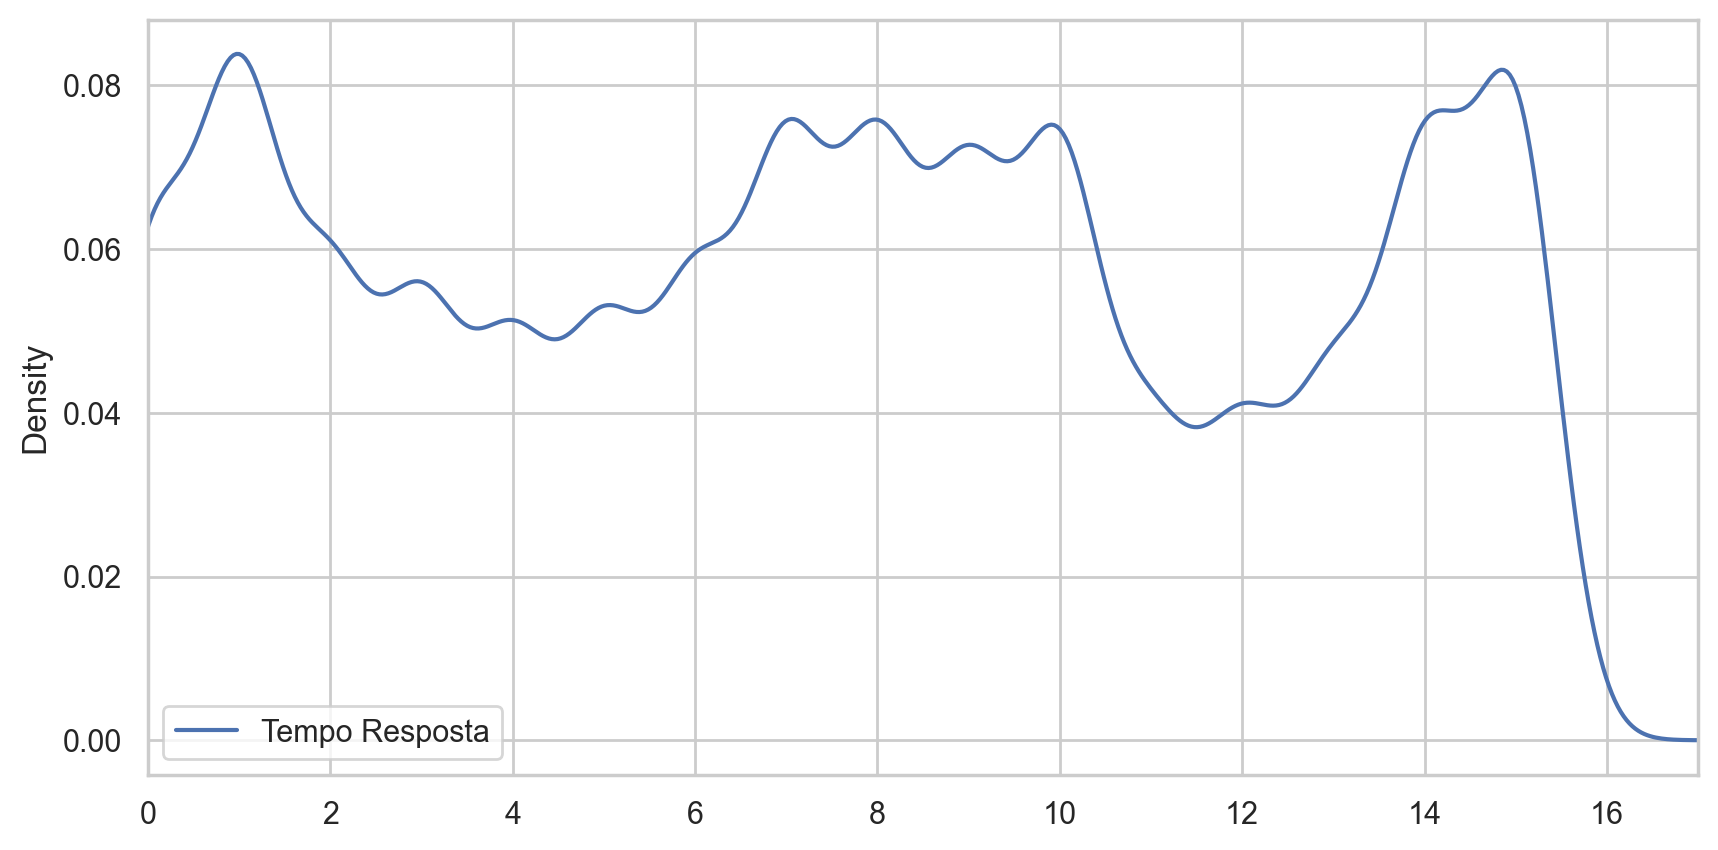

In [29]:
#Tempo médio de resposta das empresas
df_consumidor.plot.density(y='Tempo Resposta',xlim=[0,17],figsize=[10,5])

In [30]:
#Proporção de reclamações respondidas por segmento de mercado
x = df_consumidor.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

df = df_consumidor[df_consumidor['Segmento de Mercado'].isin(x.keys())]
df = df[df['Respondida']=='S']
x1 = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()
x1

Segmento de Mercado
Administradoras de Consórcios                                                252
Agua e Saneamento                                                            689
Artigos Esportivos                                                           162
Bancos de Dados e Cadastros de Consumidores                                11149
Bancos, Financeiras e Administradoras de Cartão                            26035
Cartões de Descontos                                                          86
Comércio Eletrônico                                                         8984
Construtoras, Incorporadoras e Imobiliárias                                  103
Corretoras e Sociedades de Seguros, Capitalização e Previdência             2545
Distribuidoras de Combustíveis / Gás                                         255
Editoras e Veículos de Imprensa                                               82
Empresas de Intermediação de Serviços / Negócios                            3490
Empresas

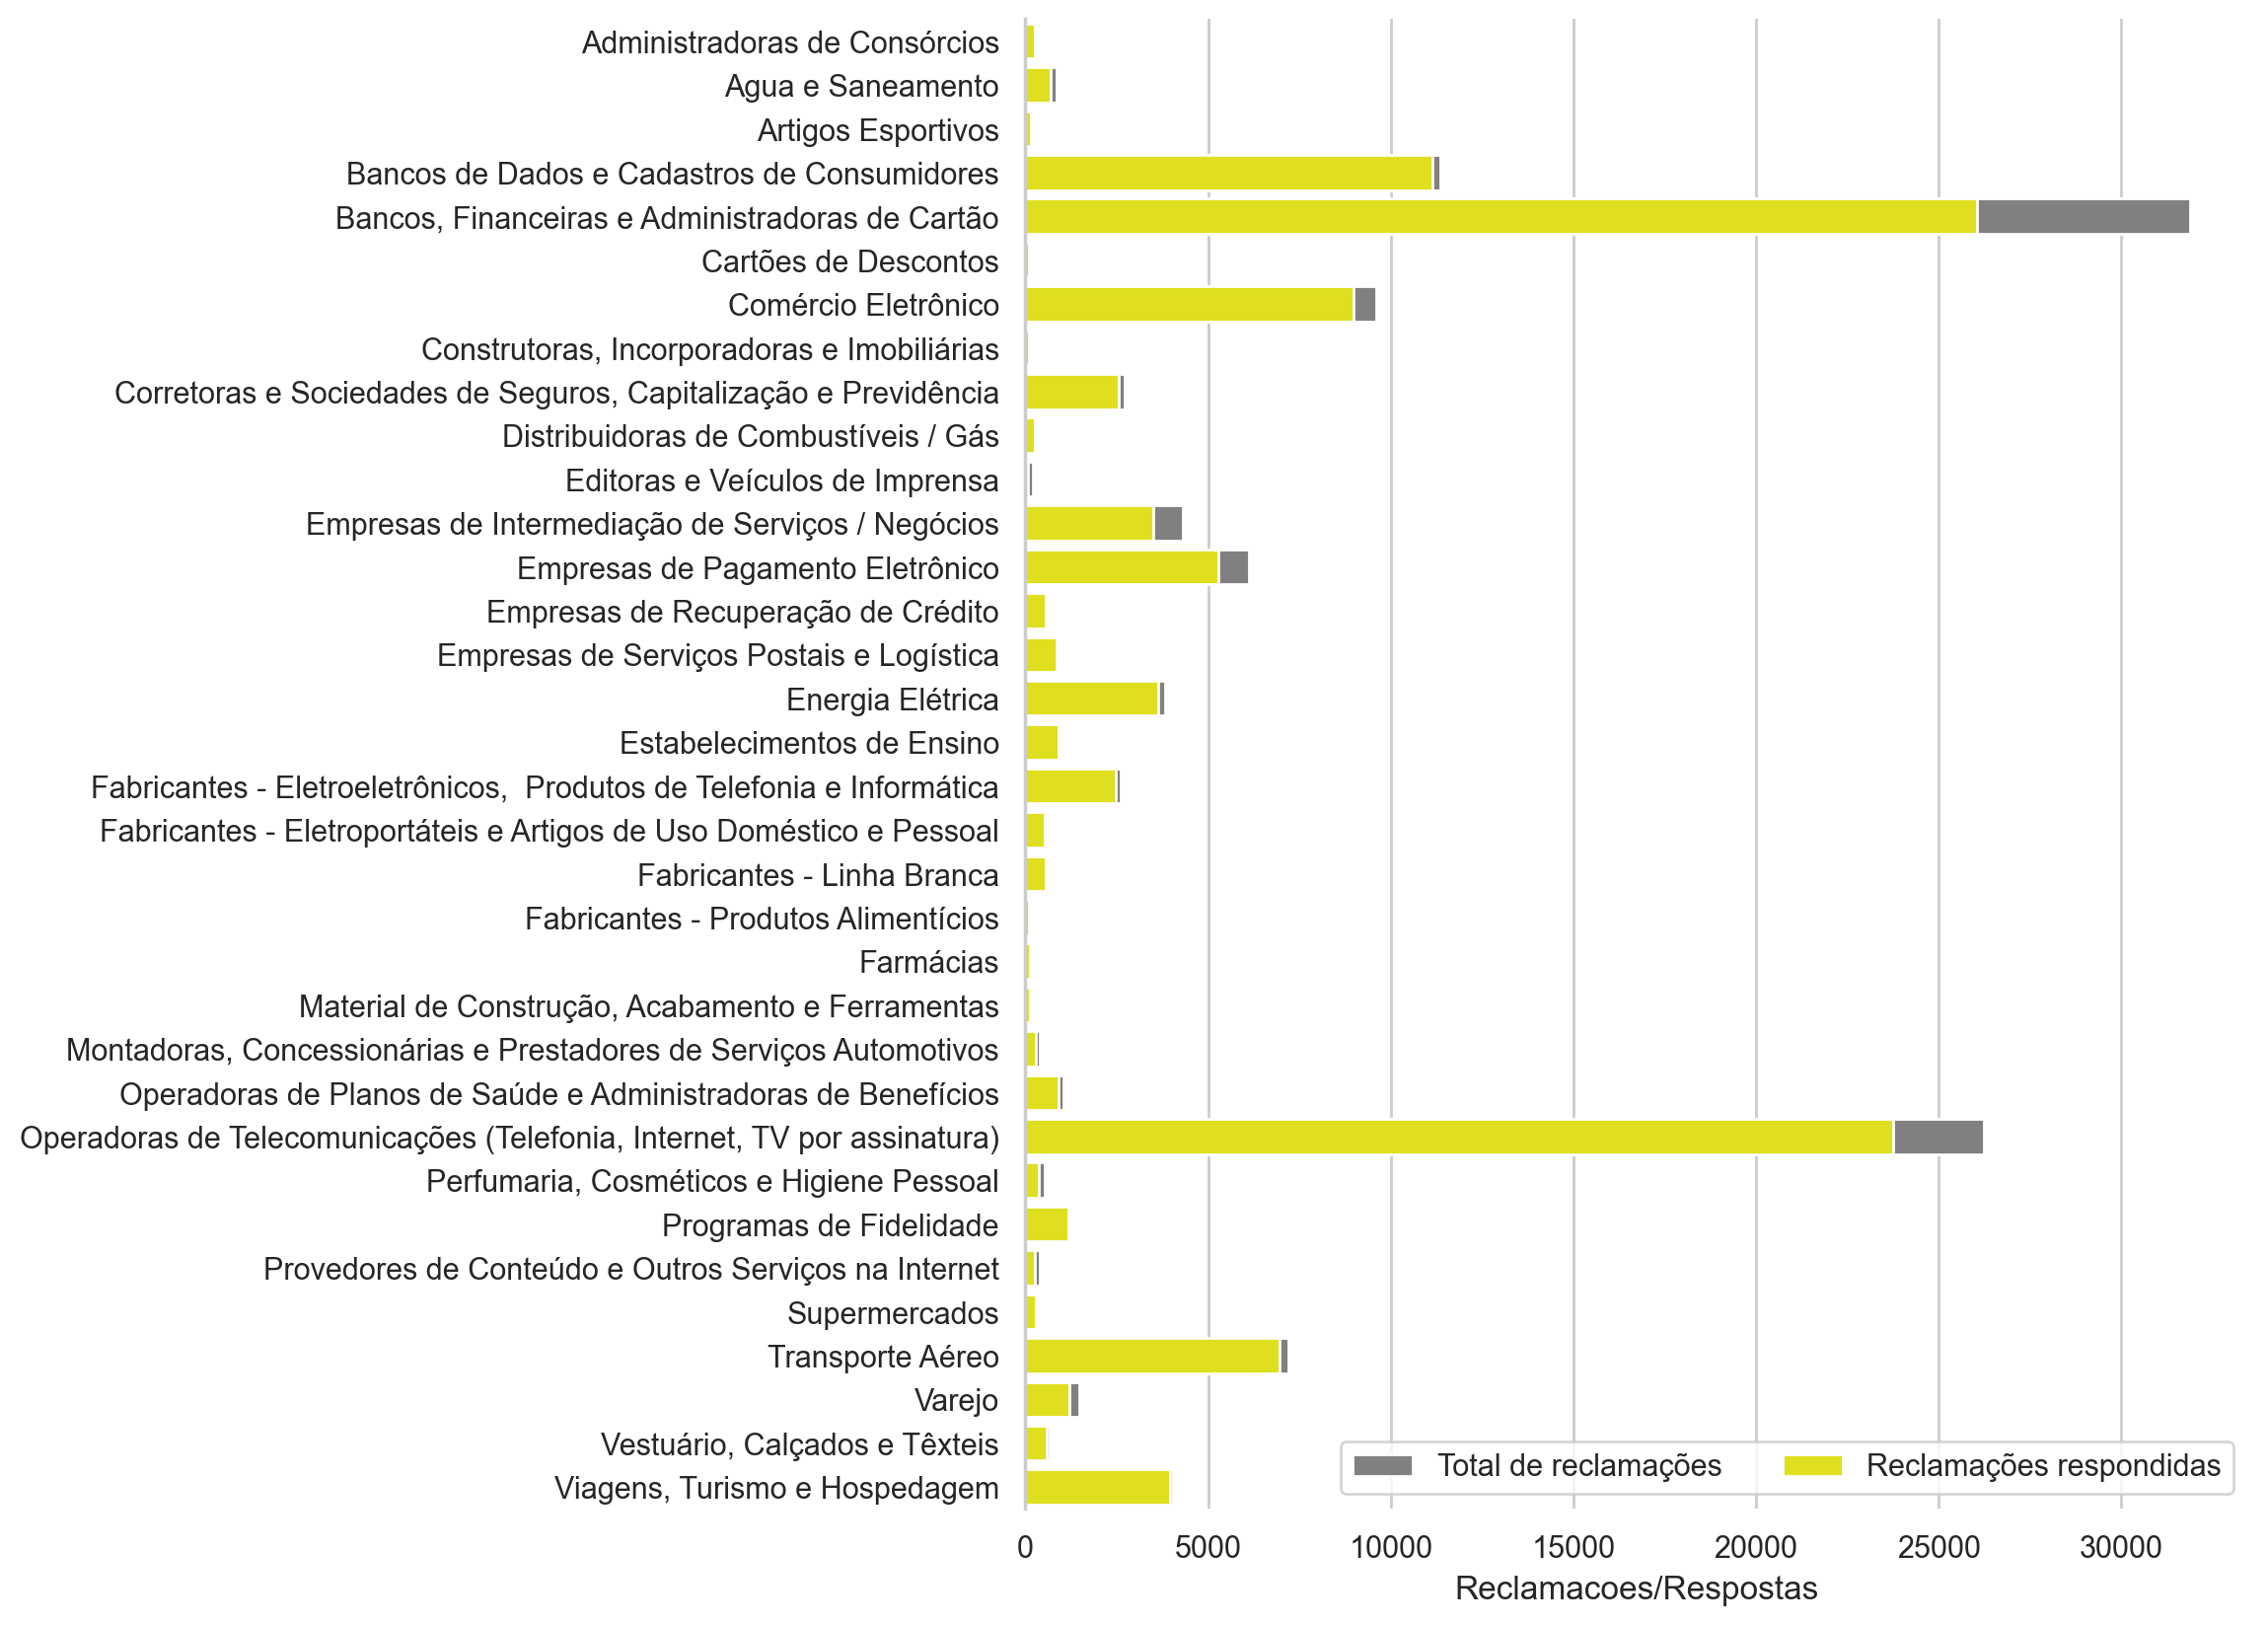

In [31]:
#Proporção de reclamações respondidas por segmento de mercado

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

#sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamações", color="grey")

#sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamações respondidas", color="yellow")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes/Respostas")
sns.despine(left=False, bottom=True)



#  - DATASET BACEN

In [32]:
#Instituições financeiras mais reclamadas

df_bacen[u'Instituição financeira'].value_counts().head(20)

BB (conglomerado)                         108
BRADESCO (conglomerado)                   105
CAIXA ECONÔMICA FEDERAL (conglomerado)    105
SANTANDER (conglomerado)                  104
ITAU (conglomerado)                       103
INTER (conglomerado)                       87
SAFRA (conglomerado)                       78
BMG (conglomerado)                         70
C6 BANK (conglomerado)                     70
PAN (conglomerado)                         69
BRB (conglomerado)                         68
BANRISUL (conglomerado)                    65
ORIGINAL (conglomerado)                    59
AGIBANK (conglomerado)                     56
VOTORANTIM (conglomerado)                  53
MERCANTIL DO BRASIL (conglomerado)         50
DAYCOVAL (conglomerado)                    49
BANCO DIGIO S.A.                           46
BNP PARIBAS (conglomerado)                 44
BANCO DIGIMAIS S.A.                        41
Name: Instituição financeira, dtype: int64

In [33]:
#Principais irregularidades reclamadas

df_bacen[u'Irregularidade'].value_counts().head(20)

Insatisfação com a resposta recebida da instituição financeira referente à reclamação registrada no BCB                                                                                                                                          57
Reclamações relacionadas a assuntos diversos                                                                                                                                                                                                     57
Irregularidades relacionadas ao Sistema de Informações de Crédito do Banco Central (SCR)                                                                                                                                                         56
Irregularidades relativas a integridade, confiabilidade, segurança, sigilo ou legitimidade dos serviços relacionados a operações de crédito                                                                                                      55
Recusa de produtos ou se

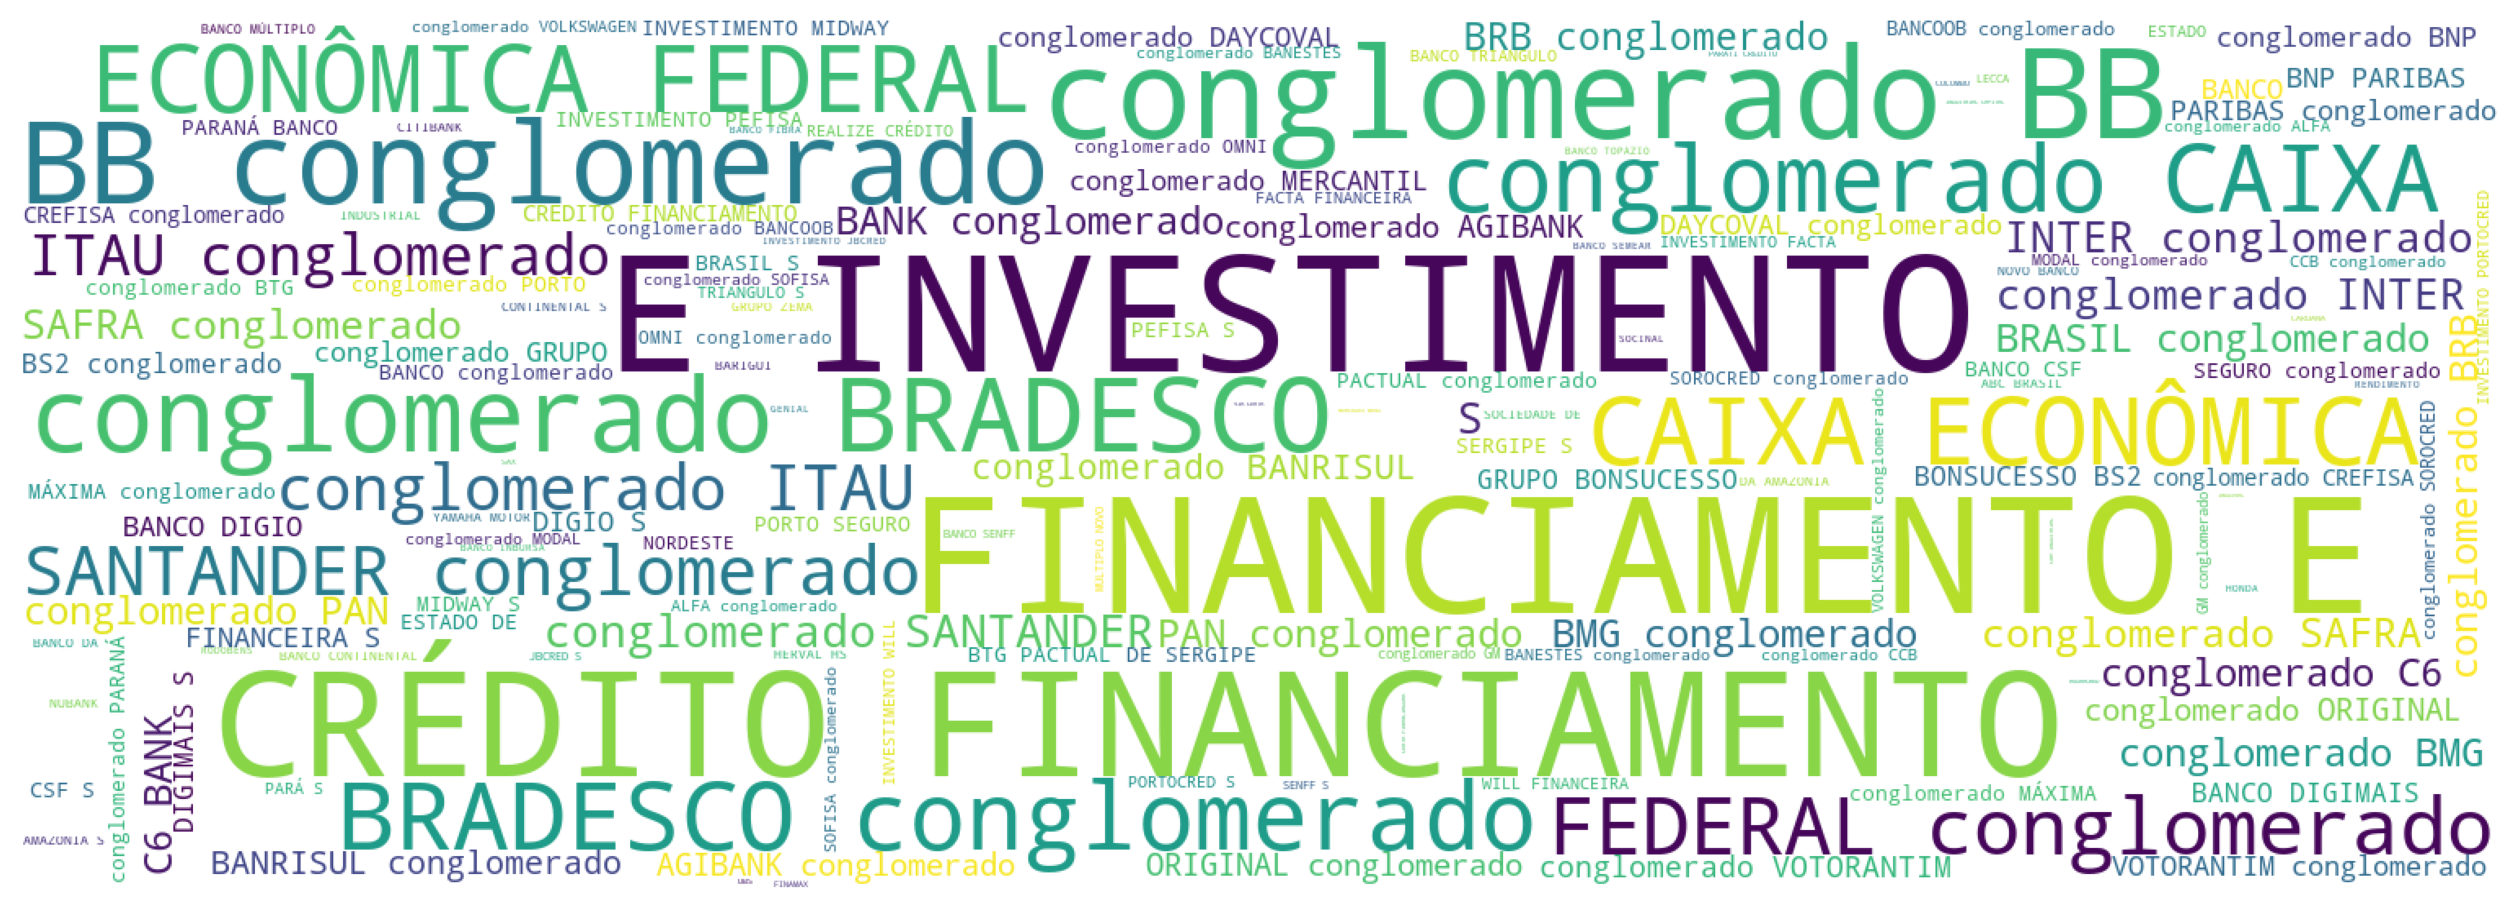

In [34]:
#Exibição das instituições mais reclamadas no BACEN no período através de WordCloud

text = ' '.join(df_bacen['Instituição financeira'])
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, colormap='viridis', background_color='white').generate(text)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()